In [1]:
import os
import pandas as pd
%matplotlib inline

from dotenv import load_dotenv
from pathlib import Path
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
rel_path = Path('../../../../Python/.env')
load_dotenv(rel_path) 

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])


In [4]:
# Create a newsapi client
current_date = date.today()
past_date = date.today() - timedelta(weeks=4)

def get_article(keyword):
    all_content = []
    all_headlines = []
    all_dates = []
    date = current_date
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > past_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date),
            to=str(date),
            language="en",
            sort_by="relevancy",
            page=1,
        )
        contents = []
        headlines = []
        for i in range(0, len(articles["articles"])):
            contents.append(articles["articles"][i]["content"])
            headlines.append(articles["articles"][i]["title"])
        all_content.append(contents)
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return articles, all_content, all_headlines, all_dates

In [5]:
# Fetch the Bitcoin news articles
bitcoin_articles, bitcoin_content, bitcoin_headlines, dates = get_article("Bitcoin")

Fetching news about 'Bitcoin'
******************************
retrieving news from: 2020-07-18
retrieving news from: 2020-07-17
retrieving news from: 2020-07-16
retrieving news from: 2020-07-15
retrieving news from: 2020-07-14
retrieving news from: 2020-07-13
retrieving news from: 2020-07-12
retrieving news from: 2020-07-11
retrieving news from: 2020-07-10
retrieving news from: 2020-07-09
retrieving news from: 2020-07-08
retrieving news from: 2020-07-07
retrieving news from: 2020-07-06
retrieving news from: 2020-07-05
retrieving news from: 2020-07-04
retrieving news from: 2020-07-03
retrieving news from: 2020-07-02
retrieving news from: 2020-07-01
retrieving news from: 2020-06-30
retrieving news from: 2020-06-29
retrieving news from: 2020-06-28
retrieving news from: 2020-06-27
retrieving news from: 2020-06-26
retrieving news from: 2020-06-25
retrieving news from: 2020-06-24
retrieving news from: 2020-06-23
retrieving news from: 2020-06-22
retrieving news from: 2020-06-21


In [6]:
bitcoin_content

[['Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars]',
  'Image copyrightReuters / AFP\r\nTwitter says hackers manipulated staff and used their credentials to access internal systems in a cyber-attack of celebrity accounts earlier this week.\r\nThe hackers had … [+4380 chars]',
  'The story behind Twitter’s massive breach on Wednesday is taking more strange turns. On Friday the New York Times published a report based on interviews with people from the “OGUsers” forum where som… [+2461 chars]',
  'The hackers who hijacked dozens of high-profile Twitter accounts this week may have had a second, less visible purpose.\r\nThe hack took place on Wednesday when the hackers successfully gained access t… [+3219 chars]',
  "On July 15, Twitter's never-ending stream of hot takes, outrage, and GIFs came to a screeching halt.\r\nInste

In [7]:
bitcoin_headlines

[["Twitter confirms 'Bitcoin' hackers copied the data of several accounts",
  'Twitter hackers manipulated staff to access internal systems',
  'The Morning After: The first side-mounted selfie camera',
  'Twitter says up to 8 accounts had all their data downloaded during its giant hack suggesting the hackers were after more than just Bitcoin',
  "What's keeping Trump's Twitter from being hacked? A White House digital fortress — and perhaps some special help from Twitter",
  'Top Stories: Apple Warns About MacBook Webcam Covers, iOS 13.6 Released, Apple Hacked on Twitter',
  'Who Pulled Off the Twitter Hack?',
  '9 great reads from CNET this week - CNET',
  'Minecraft is launching a behind-the-scenes series. Watch the trailer',
  'Twitter says 130 accounts targeted, 45 compromised in security breach',
  'How the Twitter hacker got in',
  'Hackers manipulated our staff, says Twitter',
  'The Twitter Hacks Have to Stop',
  'The first half of the year was the worst stretch for hedge funds

In [8]:
# Fetch the Ethereum news articles
ethereum_articles, ethereum_content, ethereum_headlines, dates = get_article("Ethereum")

Fetching news about 'Ethereum'
******************************
retrieving news from: 2020-07-18
retrieving news from: 2020-07-17
retrieving news from: 2020-07-16
retrieving news from: 2020-07-15
retrieving news from: 2020-07-14
retrieving news from: 2020-07-13
retrieving news from: 2020-07-12
retrieving news from: 2020-07-11
retrieving news from: 2020-07-10
retrieving news from: 2020-07-09
retrieving news from: 2020-07-08
retrieving news from: 2020-07-07
retrieving news from: 2020-07-06
retrieving news from: 2020-07-05
retrieving news from: 2020-07-04
retrieving news from: 2020-07-03
retrieving news from: 2020-07-02
retrieving news from: 2020-07-01
retrieving news from: 2020-06-30
retrieving news from: 2020-06-29
retrieving news from: 2020-06-28
retrieving news from: 2020-06-27
retrieving news from: 2020-06-26
retrieving news from: 2020-06-25
retrieving news from: 2020-06-24
retrieving news from: 2020-06-23
retrieving news from: 2020-06-22
retrieving news from: 2020-06-21


In [105]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [106]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []
for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc  = pd.DataFrame(sentiments)
btc.head()

,Compound,Negative,Neutral,Positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
2,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...


In [83]:
# Create function that computes average sentiment of articles for each day
def article_sentiment_summarizer_avg(article):
    sentiment_comp = []
    sentiment_neg = []
    sentiment_neu = []
    sentiment_pos = []
    text = []
    for day in article:
        day_score_comp = []
        day_score_neg = []
        day_score_neu = []
        day_score_pos = []
        day_text = []

        for h in day:
            if h == None:
                continue
            else:
                day_score_comp.append(analyzer.polarity_scores(h)["compound"])
                day_score_neg.append(analyzer.polarity_scores(h)["neg"])
                day_score_neu.append(analyzer.polarity_scores(h)["neu"])
                day_score_pos.append(analyzer.polarity_scores(h)["pos"])
                day_text.append(h)
        sentiment_comp.append(sum(day_score_comp) / len(day_score_comp))
        sentiment_neg.append(sum(day_score_neg) / len(day_score_neg))
        sentiment_neu.append(sum(day_score_neu) / len(day_score_neu))
        sentiment_pos.append(sum(day_score_pos) / len(day_score_pos))
        text.append(day_text)

    return sentiment_comp, sentiment_neg, sentiment_neu, sentiment_pos, text


In [84]:
# Get averages of each topics sentiment
bitcoin_avg_comp, bitcoin_avg_neg, bitcoin_avg_neu, bitcoin_avg_pos, bitcoin_text  = article_sentiment_summarizer_avg(bitcoin_content)

ethereum_avg_comp, ethereum_avg_neg, ethereum_avg_neu, ethereum_avg_pos, ethereum_text = article_sentiment_summarizer_avg(ethereum_content)


In [92]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = pd.DataFrame(
    {
        "Bitcoin_Compound": bitcoin_avg_comp,
        "Bitcoin_Negative": bitcoin_avg_neg,
        "Bitcoin_Neutral": bitcoin_avg_neu,
        "Bitcoin_Positive": bitcoin_avg_pos,
        "text" : bitcoin_text,
    }
)

In [86]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = pd.DataFrame(
    {
        "Ethereum_Compound": ethereum_avg_comp,
        "Ethereum_Negative": ethereum_avg_neg,
        "Ethereum_Neutral": ethereum_avg_neu,
        "Ethereum_Positive": ethereum_avg_pos, 
        "Ethereum_Text" : ethereum_text,
    }
)

In [93]:
# Created the Bitcoin Sentiment Dataframe
bitcoin_sentiments.index = pd.to_datetime(dates)
bitcoin_sentiments.head()

,Bitcoin_Compound,Bitcoin_Negative,Bitcoin_Neutral,Bitcoin_Positive,text
2020-07-18,-0.092458,0.057895,0.899684,0.042421,[Our investigation and cooperation with law en...
2020-07-17,0.055174,0.030000,0.925053,0.044947,[Just hackers burning up 0day like it’s a fire...
2020-07-16,0.035290,0.041900,0.905450,0.052650,[Reuters had previously reported the FBI would...
2020-07-15,-0.177440,0.083100,0.878300,0.038650,[A number of high-profile Twitter accounts wer...
2020-07-14,0.369570,0.021150,0.874850,0.104000,[Our robot colleague Satoshi Nakaboto writes a...


In [47]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments.describe()

,Bitcoin_Compound,Bitcoin_Negative,Bitcoin_Neutral,Bitcoin_Positive
count,28.000000,28.000000,28.000000,28.000000
mean,0.096512,0.044381,0.888835,0.066776
std,0.122013,0.015826,0.023259,0.020998
min,-0.177440,0.021150,0.814700,0.038650
25%,0.040146,0.029888,0.874550,0.051350
50%,0.084327,0.041975,0.886975,0.062475
75%,0.153140,0.053545,0.904475,0.078778
max,0.369570,0.083100,0.931950,0.123000


In [69]:
# Created the Bitcoin Sentiment Dataframe
ethereum_sentiments.index = pd.to_datetime(dates)
ethereum_sentiments.head()

,Ethereum_Compound,Ethereum_Negative,Ethereum_Neutral,Ethereum_Positive,Ethereum_Text
2020-07-18,0.155000,0.008833,0.947167,0.044000,[After Ethereum co-founder Gavin Wood left the...
2020-07-17,0.223055,0.035100,0.882600,0.082300,"[In the aftermath of the Twitter hack, lawmake..."
2020-07-16,0.005589,0.047632,0.908421,0.043947,[Blockchain enabled fantasy soccer platform So...
2020-07-15,0.262850,0.022350,0.894350,0.083300,[Fresh new soils can now be tilled for yield o...
2020-07-14,0.211635,0.038000,0.878400,0.083600,[Interest in bitcoin and other cryptocurrencie...


In [70]:
# Describe the Ethereum Sentiment
ethereum_sentiments.describe()

,Ethereum_Compound,Ethereum_Negative,Ethereum_Neutral,Ethereum_Positive
count,28.000000,28.000000,28.000000,28.000000
mean,0.194271,0.032697,0.890377,0.076898
std,0.099154,0.012488,0.024334,0.021041
min,-0.028255,0.008833,0.847636,0.024636
25%,0.152879,0.022750,0.881550,0.067763
50%,0.189566,0.034550,0.889307,0.077813
75%,0.250246,0.041584,0.899461,0.087813
max,0.441059,0.058211,0.947167,0.131235


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [94]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [95]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('chars')
stop.append("''")
stop = set(stop)

In [96]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    words = [word.lower() for word in words]
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


In [101]:
type(bitcoin_sentiments['text'][0][0])

str

In [107]:
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, 0day, like, ’, fire, sale, i..."
1,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."
2,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,..."
4,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...,"[image, copyrightafp/reutersimage, caption, ki..."


In [108]:
type(btc)

pandas.core.frame.DataFrame

In [89]:
# Create a new tokens column for bitcoin
bitcoin_sentiments['tokens']=tokenizer(bitcoin_sentiments['Bitcoin_Text'])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/renaemartinez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TypeError: expected string or bytes-like object

In [ ]:
# Create a new tokens column for ethereum

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [109]:
from collections import Counter
from nltk import ngrams

In [122]:
btc.text.str.cat()

"Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars]Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars]Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars]Image copyrightAFP/REUTERSImage caption\r\n Kim Kardashian West, Kanye West, Elon Musk, Bill Gates and Barack Obama were all 'hacked'\r\nT

In [115]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('elon', 'musk'), 6),
 (('bill', 'gate'), 4),
 (('barack', 'obama'), 4),
 (('twitter', 'account'), 3),
 (('joe', 'biden'), 3),
 (('send', 'bitcoin'), 2),
 (('kim', 'kardashian'), 2),
 (('kanye', 'west'), 2),
 (('gate', 'barack'), 2),
 (('cryptocurrency', 'scam'), 2),
 (('gate', 'elon'), 2),
 (('obama', 'joe'), 2),
 (('biden', 'elon'), 2),
 (('public', 'figure'), 2),
 (('hacker', 'burning'), 1),
 (('burning', '0day'), 1),
 (('0day', 'like'), 1),
 (('like', '’'), 1),
 (('’', 'fire'), 1),
 (('fire', 'sale'), 1)]

In [ ]:
# Generate the Ethereum N-grams where N=2

In [113]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [114]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('account', 13),
 ('twitter', 12),
 ('bitcoin', 6),
 ('elon', 6),
 ('musk', 6),
 ('investigation', 5),
 ('wednesday', 5),
 ('hacker', 4),
 ('tweet', 4),
 ('hack', 4)]

In [ ]:
# Get the top 10 words for Ethereum

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [130]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [wnl.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [136]:
input_words = process_text(btc.text.str.cat())

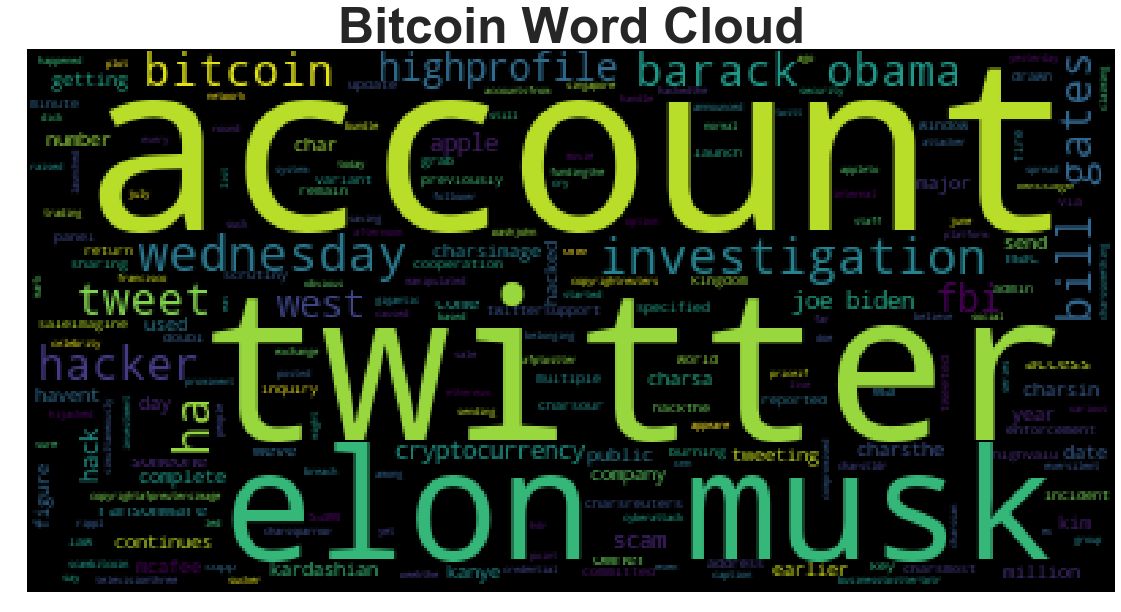

In [156]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(input_words)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

In [148]:
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

In [149]:
input_bigrams = process_text_bg(btc.text.str.cat())

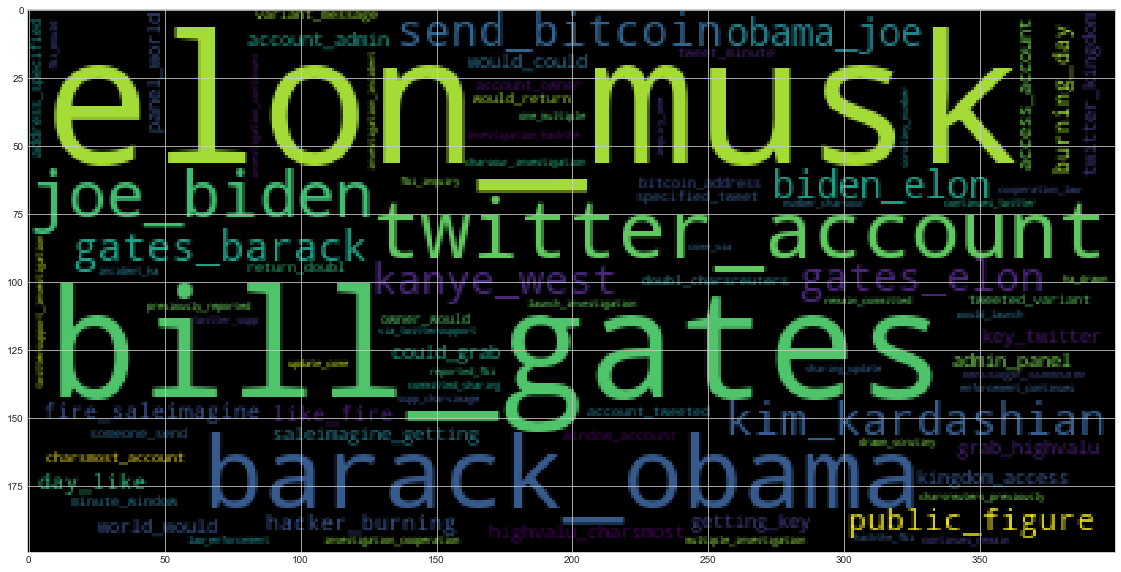

In [150]:
wc = WordCloud().generate(input_bigrams)
plt.imshow(wc)

In [ ]:
# Generate the Ethereum word cloud

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [157]:
import spacy
from spacy import displacy

In [158]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [159]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [163]:
# Concatenate all of the bitcoin text together
bitcoin=btc.text.str.cat()
bitcoin

"Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars]Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars]Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars]Image copyrightAFP/REUTERSImage caption\r\n Kim Kardashian West, Kanye West, Elon Musk, Bill Gates and Barack Obama were all 'hacked'\r\nT

In [165]:
# Run the NER processor on all of the text
doc = nlp(bitcoin)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"
displacy.render(doc, style='ent')

In [ ]:
# Render the visualization

In [ ]:
# List all Entities

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together

In [ ]:
# Run the NER processor on all of the text

# Add a title to the document

In [ ]:
# Render the visualization

In [ ]:
# List all Entities